# 1. Tree 유형 알고리즘

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from os import system  # Tree 시각화를 위함
system("pip install graphviz")
import graphviz

## 1.1. 데이터 로드

In [ ]:
# 유방암 데이터 로드
cancer = load_breast_cancer()

# 유방암 데이터 DataFrame으로 변환
cancerDF = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [ ]:
# 유방암 데이터의 타겟 변수와 정의 (1이면 양성 종양, 0이면 악성 종양)
cancerDF['diagnosis'] = cancer.target
# 보통 1을 주요 타겟이 되는 범주로 정의함
cancerDF['diagnosis'] = np.where(cancerDF['diagnosis'] == 0, 1, 0)

In [ ]:
# 최종 테스트 데이터로 사용할 50개의 관측값 분류
final_testDF = cancerDF.loc[0:49]
cancerDF = cancerDF.loc[50:]

## 1.2. 데이터 시각화

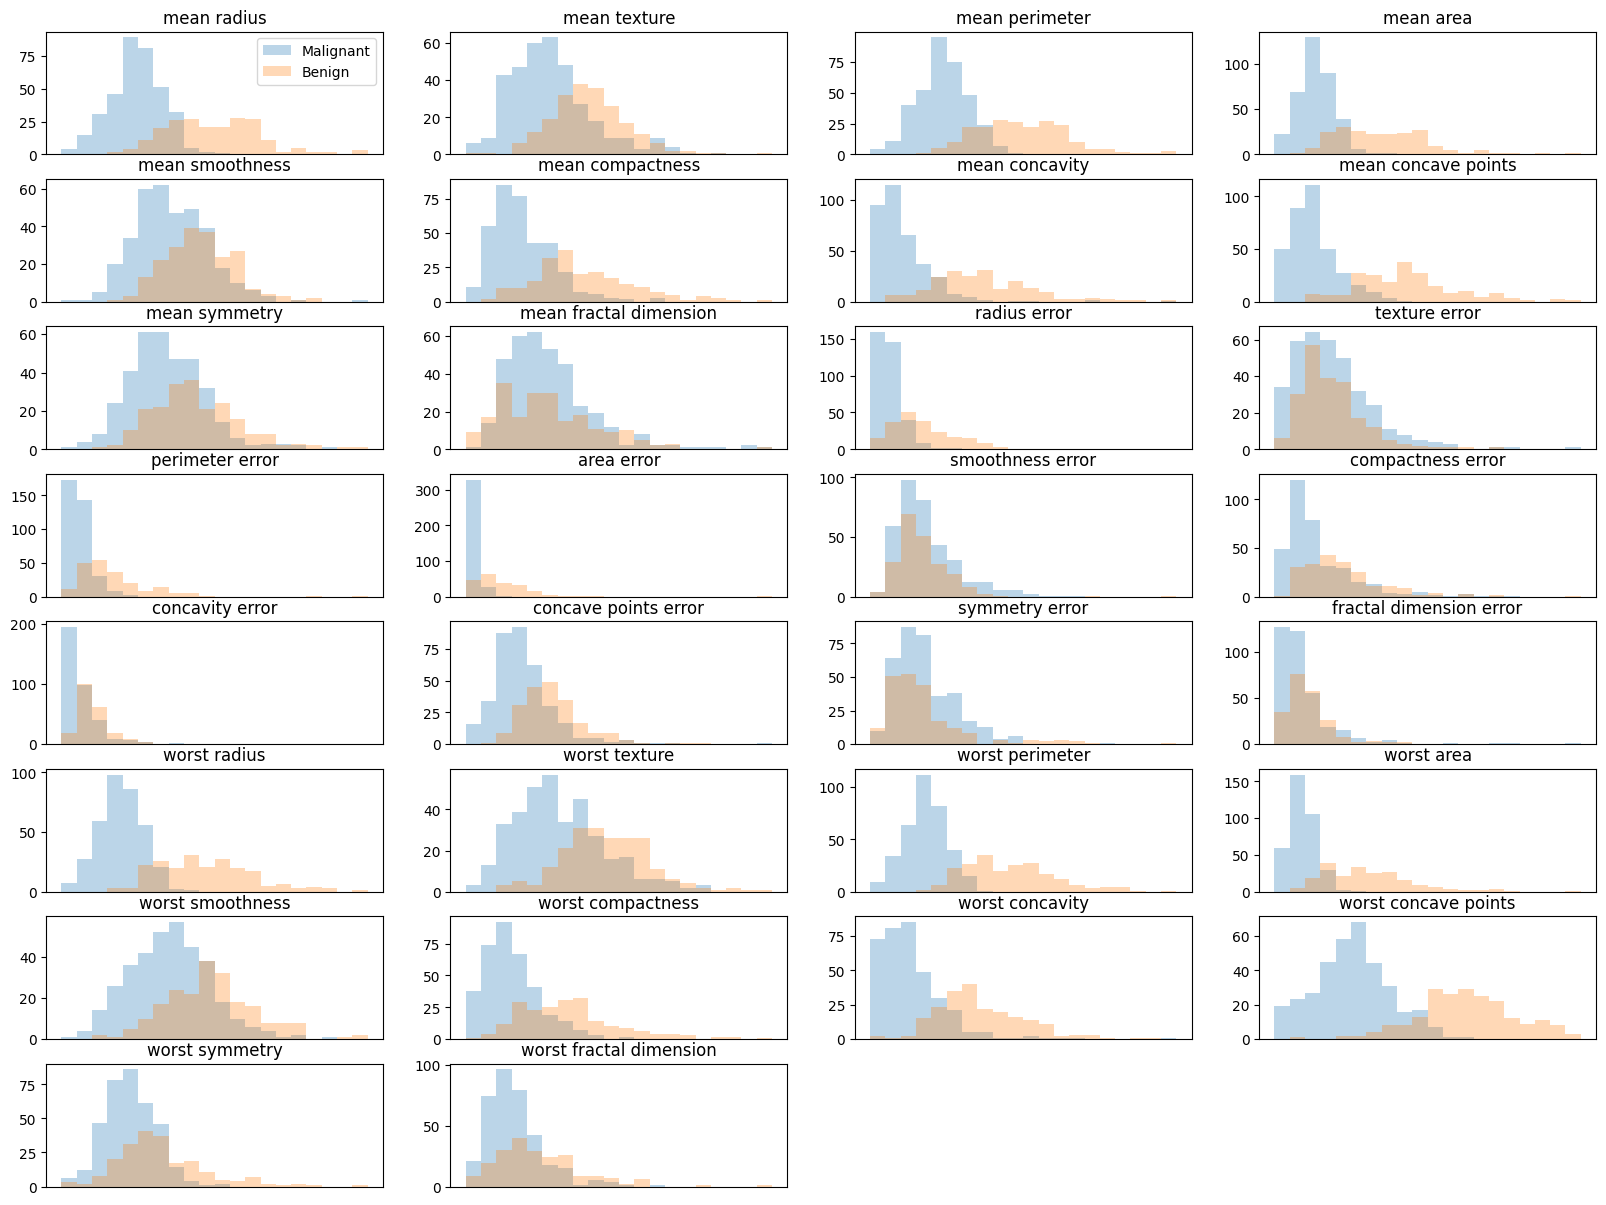

In [ ]:
# 양성 / 음성별 설명 변수의 분포 확인
plt.figure(figsize=[20,15])

malignant = cancerDF[cancerDF.diagnosis==0]
benign = cancerDF[cancerDF.diagnosis==1]

# 설명 변수 데이터 set
X_data = cancerDF.drop("diagnosis", axis = 1, inplace = False)

# 히스토그램을 활용한 모든 설명 변수에 대한 분포 확인
for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(X_data.iloc[:,col], bins=20)

    plt.hist(malignant.iloc[:,col],bins=bins, alpha=0.3)
    plt.hist(benign.iloc[:,col], bins=bins ,alpha=0.3)
    plt.title(X_data.columns[col])
    if col==0: plt.legend(['Malignant', 'Benign'])
    plt.xticks([])

# 2. 의사 결정 나무(Decision Tree)

In [ ]:
from sklearn import tree

# 타겟 변수
y_target = cancerDF['diagnosis']
X_data   = cancerDF.drop('diagnosis', axis = 1)

# 의사결정나무(Decision Tree) 모형 생성
DTree = tree.DecisionTreeClassifier(random_state=300)
DTree.fit(X_data, y_target)

DecisionTreeClassifier(random_state=300)

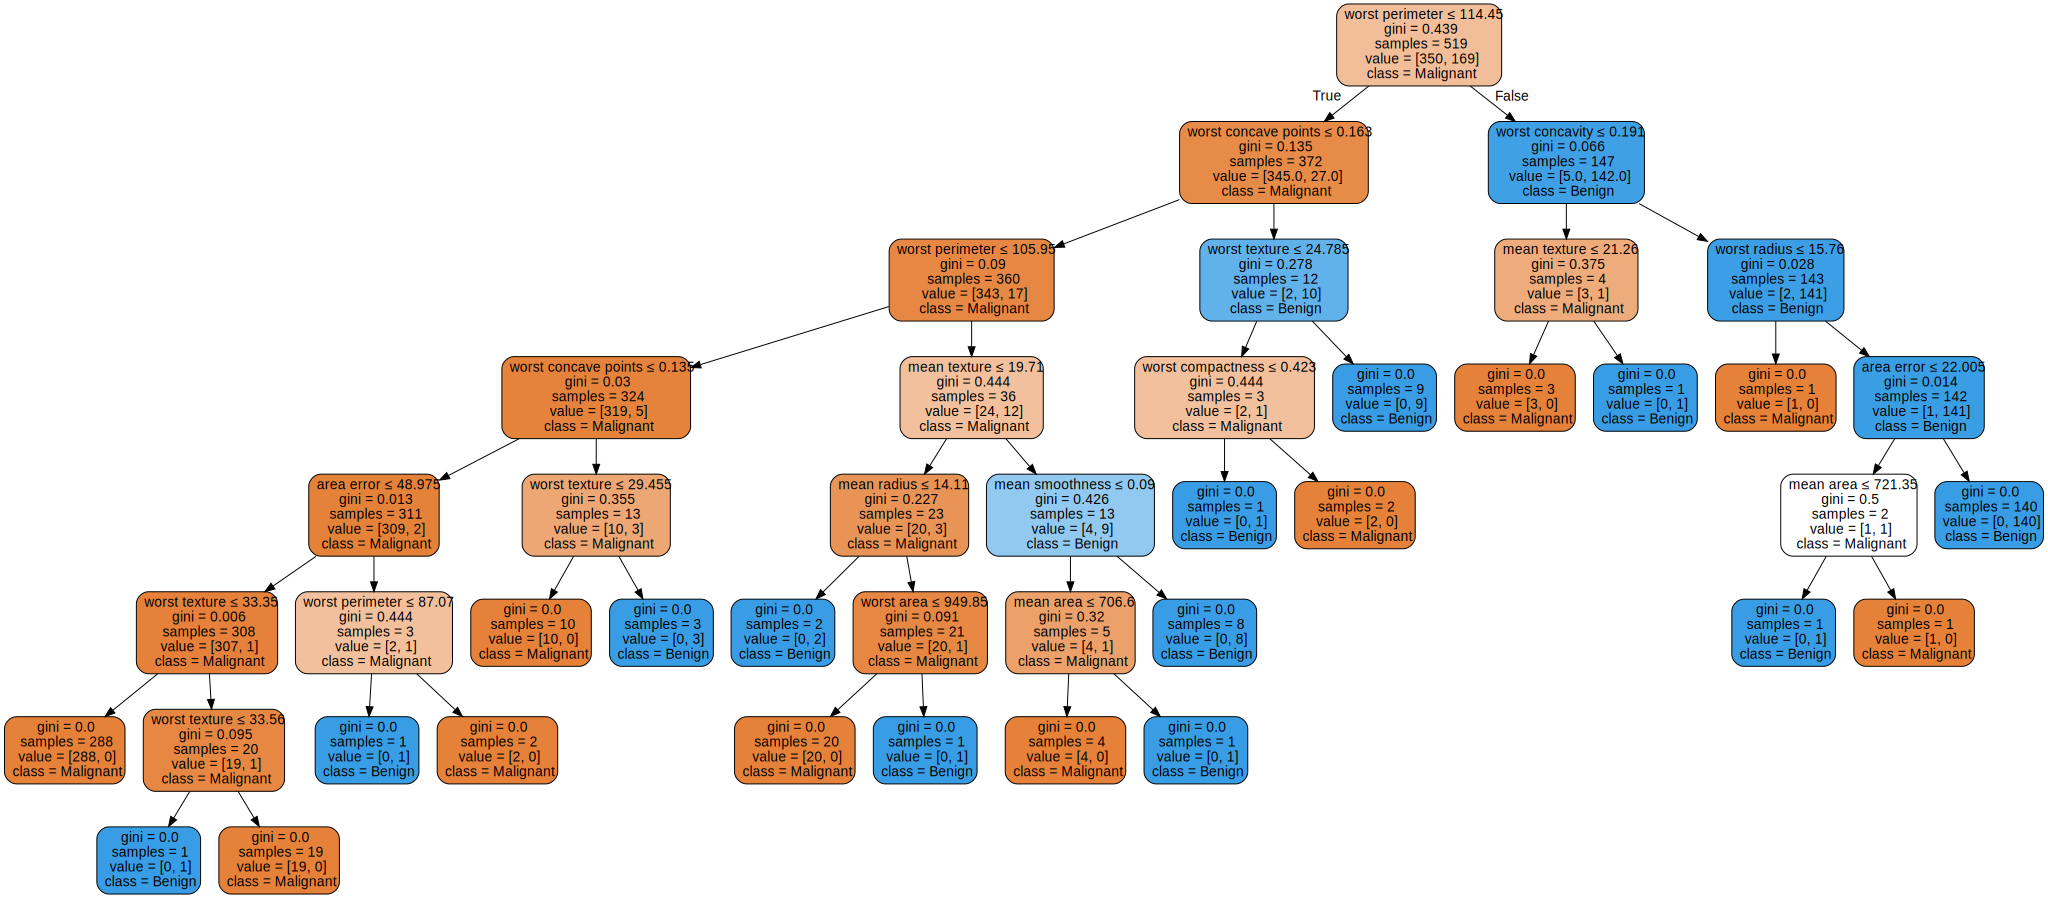

In [ ]:
# Decision Tree 그래프로 확인
dot_data = tree.export_graphviz(DTree,
                               out_file = None,                       # file로 변환하지 않음
                               feature_names = X_data.columns,        # 변수명
                               class_names = ['Malignant', 'Benign'], # 타겟 종류
                               filled = True,                         # 색상 채움
                               rounded = True,                        # 반올림 함
                               special_characters = True)             # 특수 문자 사용함

graph = graphviz.Source(dot_data)
graph

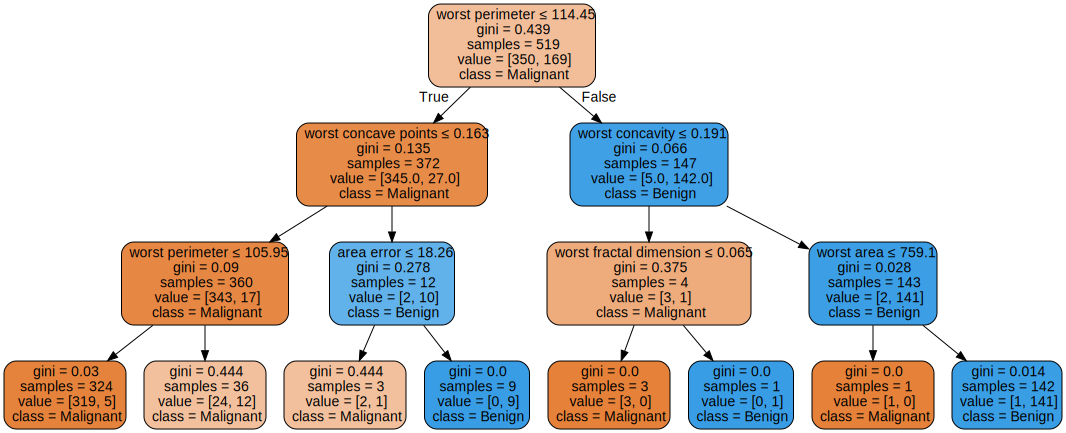

In [ ]:
# 의사결정나무(Decision Tree) 모형 생성 (depth 3으로 조절)
DTree_depth3 = tree.DecisionTreeClassifier(random_state=300, max_depth = 3)
DTree_depth3.fit(X_data, y_target)

# Decision Tree 그래프로 확인 (depth 3으로 조절)
dot_data3 = tree.export_graphviz(DTree_depth3,
                                  out_file = None,                       # file로 변환하지 않음
                                  feature_names = X_data.columns,        # 변수명
                                  class_names = ['Malignant', 'Benign'], # 타겟 종류
                                  filled = True,                         # 색상 채움
                                  rounded = True,                        # 반올림 함
                                  special_characters = True)             # 특수 문자 사용함

graph3 = graphviz.Source(dot_data3)
graph3

In [ ]:
# 타겟 변수 예측 (depth를 주지 않은 것과, 준 것 비교)
y_preds = DTree.predict(X_data)
y_preds3 = DTree_depth3.predict(X_data)

# 예측값 비교
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds, 'y_preds3' : y_preds3})

,y_target,y_preds,y_preds3
50,0,0,0
51,0,0,0
52,0,0,0
53,1,1,1
54,1,1,1
...,...,...,...
564,1,1,1
565,1,1,1
566,1,1,1
567,1,1,1


In [ ]:
from sklearn.metrics import confusion_matrix
print("Depth 제한 없는 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds))

Depth 제한 없는 의사결정 나무 결과


,0,1
0,350,0
1,0,169


In [ ]:
print("Depth를 3으로 제한한 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds3))

Depth를 3으로 제한한 의사결정 나무 결과


,0,1
0,349,1
1,18,151


# 3. 랜덤 포레스트 (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 100개의 decision tree를 사용한 랜덤 포레스트 (max_features는 sqrt개수를 사용하는 것이 디폴트임)
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_data, y_target)

# 예측값 생성
y_preds_RF = RF.predict(X_data)

# 예측값 비교
pd.DataFrame({'y_target' : y_target,'y_preds' : y_preds, 'y_preds3' : y_preds3, 'y_preds_RF' : y_preds_RF})

,y_target,y_preds,y_preds3,y_preds_RF
50,0,0,0,0
51,0,0,0,0
52,0,0,0,0
53,1,1,1,1
54,1,1,1,1
...,...,...,...,...
564,1,1,1,1
565,1,1,1,1
566,1,1,1,1
567,1,1,1,1


In [ ]:
pd.DataFrame(confusion_matrix(y_target, y_preds_RF))

,0,1
0,350,0
1,0,169


In [ ]:
# 의사 결정 나무와 랜덤 포레스트의 결과 비교
from sklearn.metrics import confusion_matrix
print("Depth 제한 없는 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds))

Depth 제한 없는 의사결정 나무 결과


,0,1
0,350,0
1,0,169


In [ ]:
print("Depth를 3으로 제한한 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_target, y_preds3))

Depth를 3으로 제한한 의사결정 나무 결과


,0,1
0,349,1
1,18,151


In [ ]:
print("랜덤 포레스트 결과(100 개의 tree 사용)")
pd.DataFrame(confusion_matrix(y_target, y_preds3))

랜덤 포레스트 결과(100 개의 tree 사용)


,0,1
0,349,1
1,18,151


## 실제 예측 데이터로 비교

In [ ]:
# 최종 데이터의 X 데이터 추출/ y 데이터 추출
y_fin  = final_testDF[['diagnosis']]
X_fin  = final_testDF.drop('diagnosis', axis = 1)

# 랜덤 포레스트와 의사결정나무 결과 확인
pred_FIN_RF = RF.predict(X_fin)
pred_FIN_Tree   = DTree.predict(X_fin)
pred_FIN_Tree3  = DTree_depth3.predict(X_fin)

In [ ]:
print("Depth 제한 없는 의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_fin, pred_FIN_Tree))

Depth 제한 없는 의사결정 나무 결과


,0,1
0,7,0
1,3,40


In [ ]:
print("Depth 3인  의사결정 나무 결과")
pd.DataFrame(confusion_matrix(y_fin, pred_FIN_Tree3))

Depth 3인  의사결정 나무 결과


,0,1
0,7,0
1,7,36


In [ ]:
print("랜덤 포레스트 결과(100 개의 tree 사용)")
pd.DataFrame(confusion_matrix(y_fin, pred_FIN_RF))

랜덤 포레스트 결과(100 개의 tree 사용)


,0,1
0,7,0
1,4,39
